In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

## Step 1. Read data and understand data patterns

In [2]:
# read data
df = pd.read_csv('data.csv', encoding="ISO-8859-1")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


Detect null values in Description and CustomerID

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399668 entries, 0 to 399667
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   InvoiceNo               399668 non-null  object        
 1   StockCode               399668 non-null  object        
 2   Description             399668 non-null  object        
 3   Quantity                399668 non-null  int64         
 4   InvoiceDate             399668 non-null  datetime64[ns]
 5   UnitPrice               399668 non-null  float64       
 6   CustomerID              399668 non-null  float64       
 7   Country                 399668 non-null  object        
 8   InvoiceYear             399668 non-null  int64         
 9   InvoiceMonth            399668 non-null  int64         
 10  InvoiceDay              399668 non-null  object        
 11  day_since_lastpurchase  399668 non-null  int64         
 12  TotalValuePurchased     399668

,Quantity,UnitPrice,CustomerID,InvoiceYear,InvoiceMonth,day_since_lastpurchase,TotalValuePurchased,Total_Spend,Day_Of_Week,Hour,Transaction_Status
count,399668.000000,399668.000000,399668.000000,399668.000000,399668.000000,399668.000000,399668.000000,399668.000000,399668.000000,399668.000000,399668.000000
mean,12.195335,2.908023,15288.771766,2010.934356,7.596360,152.026389,20.681270,20.681270,2.599978,12.732428,0.021283
std,250.058617,4.452374,1710.780951,0.247660,3.417451,112.711601,425.526672,425.526672,1.918435,2.287375,0.144325
min,-80995.000000,0.001000,12346.000000,2010.000000,1.000000,0.000000,-168469.600000,-168469.600000,0.000000,6.000000,0.000000
25%,2.000000,1.250000,13959.000000,2011.000000,5.000000,50.000000,4.250000,4.250000,1.000000,11.000000,0.000000
50%,5.000000,1.950000,15152.000000,2011.000000,8.000000,133.000000,11.580000,11.580000,2.000000,13.000000,0.000000
75%,12.000000,3.750000,16791.000000,2011.000000,11.000000,247.000000,19.500000,19.500000,4.000000,14.000000,0.000000
max,80995.000000,649.500000,18287.000000,2011.000000,12.000000,373.000000,168469.600000,168469.600000,6.000000,20.000000,1.000000


In [4]:
null_count = df.isnull().sum()
null_percentage = df.isnull().sum() / (df.shape[0]+0.001) * 100# percentage
print('count and percentages of null values for each column:\n', pd.concat([null_count, null_percentage], axis=1))

count and percentages of null values for each column:
                   0          1
InvoiceNo         0   0.000000
StockCode         0   0.000000
Description    1454   0.268311
Quantity          0   0.000000
InvoiceDate       0   0.000000
UnitPrice         0   0.000000
CustomerID   135080  24.926694
Country           0   0.000000


In [5]:
df.describe(include='object').T # categorical
df.describe().T # numerical
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
InvoiceNo,541909,25900,573585,1114,NaN,NaN,NaN,NaN,NaN,NaN,NaN
StockCode,541909,4070,85123A,2313,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity,541909.0,NaN,NaN,NaN,9.55225,218.081158,-80995.0,1.0,3.0,10.0,80995.0
InvoiceDate,541909,23260,10/31/2011 14:41,1114,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UnitPrice,541909.0,NaN,NaN,NaN,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,NaN,NaN,NaN,15287.69057,1713.600303,12346.0,13953.0,15152.0,16791.0,18287.0
Country,541909,38,United Kingdom,495478,NaN,NaN,NaN,NaN,NaN,NaN,NaN


plot missing data examples

In [6]:
df[df["CustomerID"].isnull()].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom


In [7]:
df[df["Description"].isnull()].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,12/1/2010 14:32,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,12/1/2010 14:34,0.0,NaN,United Kingdom


plot some quantity values

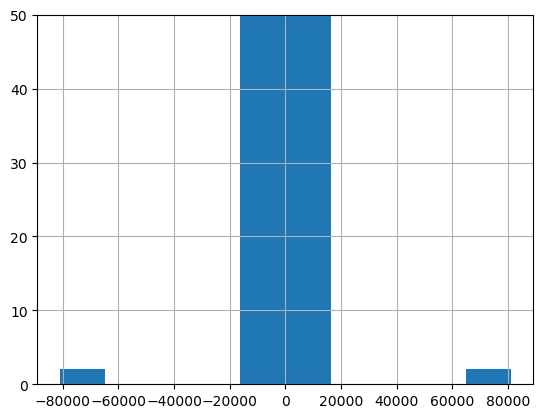

In [8]:
df[df["Quantity"]==-80995] # one record
df[df["Quantity"]==80995] # one record
df[df["Quantity"]==-74215] # one record
df[df["Quantity"]<0].head() # product return. 10624 records
df["Quantity"].hist() 
plt.ylim(0, 50)
plt.show()

plot some price values

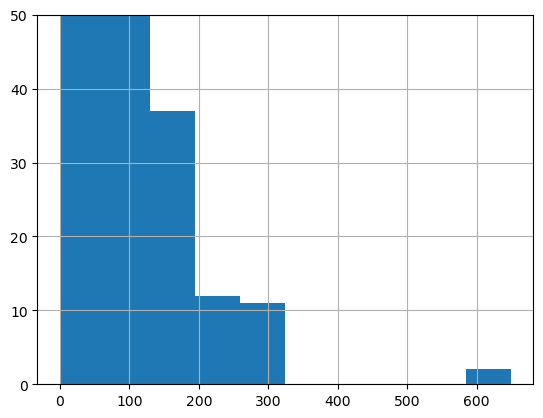

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYear,InvoiceMonth,InvoiceDay,day_since_lastpurchase,TotalValuePurchased,Total_Spend,Day_Of_Week,Hour,Transaction_Status


In [50]:
df["UnitPrice"].hist() 
plt.ylim(0, 50)
plt.show()

df[df["UnitPrice"]==0].head(50)

Summary: 
- InvoiceNo and StockCode: no data missing, assume data are correct
- Description: 1454 data missing, assume data are correct
- Quantity: min and max are +/-80995, histogram tells that only a few values are beyond +/-60000, indicating those values are probably wrong. no data missing
- InvoiceDate: no data missing, assume data are correct
- UnitPrice: min = -11062.06 -> remove negative, max price > 30000: might be wrong or a very expensive product, remove. price = 0 -> 40 samples, no data missing
- CustomerID: large amount of data missing -> remove, assume data are correct
- Country: no data missing, assume data are correct

## Step 2. Data cleaning

Remove missing data according to CustomerID. Do not need to remove missing data at Product description column

In [10]:
df = df.dropna(subset=["CustomerID"])

In [11]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

Remove duplicates

In [12]:
duplicates = df[df.duplicated(keep=False)] # keep=False, all columns are identified

In [13]:
# Sorting the data by certain columns to see the duplicate rows next to each other
duplicate_sorted = duplicates.sort_values(by=['InvoiceNo', 'StockCode', 'Description', 'CustomerID', 'Quantity'])
duplicate_sorted.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom


In [14]:
df.drop_duplicates(inplace=True)

process UnitPrice values. remove negative price and outlier price

In [15]:
df = df[(df["UnitPrice"]>0) & (df["UnitPrice"]<30000)]
df["UnitPrice"].describe()

count    401563.000000
mean          3.377373
std          32.959024
min           0.001000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: UnitPrice, dtype: float64

process Quantity values

In [16]:
df[df["Quantity"]<0].head() # negative quantity = return, invoiceNo starts with C

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom


stockcodes processing

In [17]:
unique_stock_codes = df['StockCode'].nunique()
print("number of unique stock codes: " + str(unique_stock_codes))

number of unique stock codes: 3684


In [18]:
# top 10 frequent stock codes
top_10_stock_codes = df['StockCode'].value_counts(normalize=True).head(20) * 100
top_10_stock_codes

85123A    0.514241
22423     0.471408
85099B    0.413136
47566     0.350630
84879     0.349883
20725     0.335190
22720     0.304809
POST      0.297836
22197     0.276420
23203     0.275922
20727     0.273681
22383     0.269696
21212     0.264467
23298     0.257245
23209     0.256747
22086     0.252264
22382     0.250521
20728     0.249027
22469     0.246537
22457     0.246288
Name: StockCode, dtype: float64

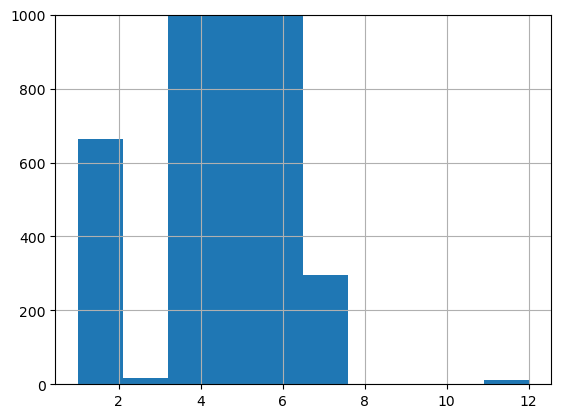

In [19]:
# check stock codes with less than 5 chars
df["StockCode"].str.len().hist()
plt.ylim(0, 1000)
plt.show()

#df[df["StockCode"]== "BANK CHARGES"].iloc[0].str.len()#.str.len()#.hist()

df[df["StockCode"].str.len() == 5]["StockCode"].unique() # DOT, POST...doest represent product
# filter out
df = df[df["StockCode"].str.len() > 4]

Check Description

In [20]:
# make descriptions all lower cases
df['Description'] = df['Description'].str.lower()
df['Description'].value_counts().head(50)

white hanging heart t-light holder     2058
regency cakestand 3 tier               1893
jumbo bag red retrospot                1659
party bunting                          1408
assorted colour bird ornament          1405
lunch bag red retrospot                1345
set of 3 cake tins pantry design       1224
lunch bag  black skull.                1099
pack of 72 retrospot cake cases        1062
spotty bunting                         1026
paper chain kit 50's christmas         1013
lunch bag spaceboy design              1006
lunch bag cars blue                    1000
heart of wicker small                   990
natural slate heart chalkboard          989
jam making set with jars                965
lunch bag pink polkadot                 961
lunch bag suki design                   932
alarm clock bakelike red                917
wooden picture frame white finish       900
rex cash+carry jumbo shopper            900
jumbo bag pink polkadot                 897
set of 4 pantry jelly moulds    

add a new column "InvoiceYear" and "Invoice Month" and "Invoice Day"

In [21]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df["InvoiceYear"] = df['InvoiceDate'].dt.year
df["InvoiceMonth"] = df['InvoiceDate'].dt.month
df["InvoiceDay"] = df['InvoiceDate'].dt.date

# data aggregation
monthly_summary = df.groupby(['InvoiceYear', 'InvoiceMonth']).agg({'Quantity': 'sum', 'UnitPrice': 'sum'})

# remove invoice day column
# customer_data.drop(columns=['InvoiceDay'], inplace=True)

# Print the results
print("Monthly Summary - Number of Items Purchased and Total Prices:")
print(monthly_summary)

Monthly Summary - Number of Items Purchased and Total Prices:
                          Quantity   UnitPrice
InvoiceYear InvoiceMonth                      
2010        12              294756   82064.250
2011        1               268464   67653.560
            2               262214   62912.880
            3               343751   83555.420
            4               277519   68781.050
            5               368538   89250.210
            6               356077   84575.510
            7               361116   73745.930
            8               385442   76272.930
            9               535856  113070.831
            10              568178  141194.110
            11              649879  174454.120
            12              202295   44712.850


In [22]:
# reset index
df.reset_index(drop=True, inplace=True)

In [23]:
# show the df result after data cleaning
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYear,InvoiceMonth,InvoiceDay
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,2010-12-01
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,2010-12-01
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,2010-12-01
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,2010-12-01
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,2010-12-01
...,...,...,...,...,...,...,...,...,...,...,...
399663,581587,22613,pack of 20 spaceboy napkins,12,2011-12-09 12:50:00,0.85,12680.0,France,2011,12,2011-12-09
399664,581587,22899,children's apron dolly girl,6,2011-12-09 12:50:00,2.10,12680.0,France,2011,12,2011-12-09
399665,581587,23254,childrens cutlery dolly girl,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,12,2011-12-09
399666,581587,23255,childrens cutlery circus parade,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,12,2011-12-09


## Step 3. Feature Learning (for recommending bundles)

## 3.1 days since last purchase

In [24]:
# Find the most recent purchase date for each customer
customer_data = df.groupby('CustomerID')['InvoiceDay'].max().reset_index()

# find the latest purchase date from all purchases
most_recent_date = df['InvoiceDay'].max()

# number of days since last purchase
customer_data['Days_Since_Last_Purchase'] = (most_recent_date - customer_data['InvoiceDay']).dt.days

# Remove the InvoiceDay column
customer_data.drop(columns=['InvoiceDay'], inplace=True)

customer_data

,CustomerID,Days_Since_Last_Purchase
0,12346.0,325
1,12347.0,2
2,12348.0,75
3,12349.0,18
4,12350.0,310
...,...,...
4357,18280.0,277
4358,18281.0,180
4359,18282.0,7
4360,18283.0,3


In [25]:
# add days since last purchase
mostrecentday = df['InvoiceDay'].max()
df['day_since_lastpurchase'] = (mostrecentday - df['InvoiceDay']).dt.days

## 3.2 total transactions and total product purchased and total values

In [39]:
# nunique count the unique value , resetindex set a extra index column
TotalTransactions = df.groupby("CustomerID")["InvoiceNo"].nunique().reset_index()
TotalTransactions.rename(columns={"InvoiceNo":"TotalTransactions"},inplace=True)
#TotalTransactions.columns = []
# count sum(purchase quantity)
TotalProductPurchased = df.groupby("CustomerID")["Quantity"].sum().reset_index()
TotalProductPurchased.rename(columns={"Quantity":"TotalProductPurchased"},inplace=True)
#TotalPurchaseValue = df.groupby("CustomerID")[""]

# total value purchased
df["TotalValuePurchased"] = df["UnitPrice"] * df["Quantity"]
TotalValuePurchased = df.groupby("CustomerID")["TotalValuePurchased"].sum().reset_index()
TotalValuePurchased

# average value purchased
# Calculate the total spend by each customer
df['Total_Spend'] = df['UnitPrice'] * df['Quantity']
total_spend = df.groupby('CustomerID')['Total_Spend'].sum().reset_index()

# Calculate the average transaction value for each customer
average_transaction_value = total_spend.merge(TotalTransactions, on='CustomerID') # merge dataframe
average_transaction_value['Average_Transaction_Value'] = average_transaction_value['Total_Spend'] / average_transaction_value['TotalTransactions']
average_transaction_value

# merge all calculations into customer_data
customer_data = pd.merge(customer_data, TotalTransactions, on='CustomerID')
customer_data = pd.merge(customer_data,TotalProductPurchased, on='CustomerID')
customer_data = pd.merge(customer_data,total_spend, on='CustomerID')
customer_data = pd.merge(customer_data,average_transaction_value[["CustomerID","Average_Transaction_Value"]], on='CustomerID')
#customer_data = pd.merge(customer_data, average_transaction_value[['CustomerID', 'Average_Transaction_Value']], on='CustomerID')

# Display the first few rows of the customer_data dataframe
customer_data.head(100)

,CustomerID,Days_Since_Last_Purchase,TotalTransactions_x,TotalProductPurchased_x,TotalTransactions_y,TotalProductPurchased_y,Total_Spend_x,Average_Transaction_Value_x,TotalTransactions_x,TotalProductPurchased_x,...,Total_Spend_y,Average_Transaction_Value_y,TotalTransactions_y,TotalProductPurchased_y,Total_Spend_x,Average_Transaction_Value_x,TotalTransactions,TotalProductPurchased,Total_Spend_y,Average_Transaction_Value_y
0,12346.0,325,2,0,2,0,0.00,0.000000,2,0,...,0.00,0.000000,2,0,0.00,0.000000,2,0,0.00,0.000000
1,12347.0,2,7,2458,7,2458,4310.00,615.714286,7,2458,...,4310.00,615.714286,7,2458,4310.00,615.714286,7,2458,4310.00,615.714286
2,12348.0,75,4,2332,4,2332,1437.24,359.310000,4,2332,...,1437.24,359.310000,4,2332,1437.24,359.310000,4,2332,1437.24,359.310000
3,12349.0,18,1,630,1,630,1457.55,1457.550000,1,630,...,1457.55,1457.550000,1,630,1457.55,1457.550000,1,630,1457.55,1457.550000
4,12350.0,310,1,196,1,196,294.40,294.400000,1,196,...,294.40,294.400000,1,196,294.40,294.400000,1,196,294.40,294.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,12462.0,2,4,505,4,505,872.01,218.002500,4,505,...,872.01,218.002500,4,505,872.01,218.002500,4,505,872.01,218.002500
96,12463.0,46,6,751,6,751,1165.63,194.271667,6,751,...,1165.63,194.271667,6,751,1165.63,194.271667,6,751,1165.63,194.271667
97,12464.0,10,8,95,8,95,957.05,119.631250,8,95,...,957.05,119.631250,8,95,957.05,119.631250,8,95,957.05,119.631250
98,12465.0,7,3,471,3,471,673.89,224.630000,3,471,...,673.89,224.630000,3,471,673.89,224.630000,3,471,673.89,224.630000


## 3.3 Product diversity purchased

In [40]:
unique_products_purchased = df.groupby("CustomerID")["StockCode"].nunique().reset_index()
unique_products_purchased.rename(columns={'StockCode': 'Unique_Products_Purchased'}, inplace=True)

# Merge the new feature into the customer_data dataframe
customer_data = pd.merge(customer_data, unique_products_purchased, on='CustomerID')
customer_data

,CustomerID,Days_Since_Last_Purchase,TotalTransactions_x,TotalProductPurchased_x,TotalTransactions_y,TotalProductPurchased_y,Total_Spend_x,Average_Transaction_Value_x,TotalTransactions_x,TotalProductPurchased_x,...,Average_Transaction_Value_y,TotalTransactions_y,TotalProductPurchased_y,Total_Spend_x,Average_Transaction_Value_x,TotalTransactions,TotalProductPurchased,Total_Spend_y,Average_Transaction_Value_y,Unique_Products_Purchased
0,12346.0,325,2,0,2,0,0.00,0.000000,2,0,...,0.000000,2,0,0.00,0.000000,2,0,0.00,0.000000,1
1,12347.0,2,7,2458,7,2458,4310.00,615.714286,7,2458,...,615.714286,7,2458,4310.00,615.714286,7,2458,4310.00,615.714286,103
2,12348.0,75,4,2332,4,2332,1437.24,359.310000,4,2332,...,359.310000,4,2332,1437.24,359.310000,4,2332,1437.24,359.310000,21
3,12349.0,18,1,630,1,630,1457.55,1457.550000,1,630,...,1457.550000,1,630,1457.55,1457.550000,1,630,1457.55,1457.550000,72
4,12350.0,310,1,196,1,196,294.40,294.400000,1,196,...,294.400000,1,196,294.40,294.400000,1,196,294.40,294.400000,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4357,18280.0,277,1,45,1,45,180.60,180.600000,1,45,...,180.600000,1,45,180.60,180.600000,1,45,180.60,180.600000,10
4358,18281.0,180,1,54,1,54,80.82,80.820000,1,54,...,80.820000,1,54,80.82,80.820000,1,54,80.82,80.820000,7
4359,18282.0,7,3,98,3,98,176.60,58.866667,3,98,...,58.866667,3,98,176.60,58.866667,3,98,176.60,58.866667,12
4360,18283.0,3,16,1355,16,1355,2039.58,127.473750,16,1355,...,127.473750,16,1355,2039.58,127.473750,16,1355,2039.58,127.473750,262


## 3.4 Purchase behavior

In [41]:
# Extract day of week and hour from InvoiceDate
df['Day_Of_Week'] = df['InvoiceDate'].dt.dayofweek
df['Hour'] = df['InvoiceDate'].dt.hour

# Calculate the average number of days between consecutive purchases
days_between_purchases = df.groupby('CustomerID')['InvoiceDay'].apply(lambda x: (x.sort_values().diff().dropna()).apply(lambda y: y.days))
average_days_between_purchases = days_between_purchases.groupby('CustomerID').mean().reset_index()
average_days_between_purchases.rename(columns={'InvoiceDay': 'Average_Days_Between_Purchases'}, inplace=True)

# Find the favorite shopping day of the week
favorite_shopping_day = df.groupby(['CustomerID', 'Day_Of_Week']).size().reset_index(name='Count')
favorite_shopping_day = favorite_shopping_day.loc[favorite_shopping_day.groupby('CustomerID')['Count'].idxmax()][['CustomerID', 'Day_Of_Week']]

# Find the favorite shopping hour of the day
favorite_shopping_hour = df.groupby(['CustomerID', 'Hour']).size().reset_index(name='Count')
favorite_shopping_hour = favorite_shopping_hour.loc[favorite_shopping_hour.groupby('CustomerID')['Count'].idxmax()][['CustomerID', 'Hour']]

# Merge the new features into the customer_data dataframe
customer_data = pd.merge(customer_data, average_days_between_purchases, on='CustomerID')
customer_data = pd.merge(customer_data, favorite_shopping_day, on='CustomerID')
customer_data = pd.merge(customer_data, favorite_shopping_hour, on='CustomerID')

# Display the first few rows of the customer_data dataframe
customer_data.head()

,CustomerID,Days_Since_Last_Purchase,TotalTransactions_x,TotalProductPurchased_x,TotalTransactions_y,TotalProductPurchased_y,Total_Spend_x,Average_Transaction_Value_x,TotalTransactions_x,TotalProductPurchased_x,...,Total_Spend_x,Average_Transaction_Value_x,TotalTransactions,TotalProductPurchased,Total_Spend_y,Average_Transaction_Value_y,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour
0,12346.0,325,2,0,2,0,0.00,0.000000,2,0,...,0.00,0.000000,2,0,0.00,0.000000,1,0.000000,1,10
1,12347.0,2,7,2458,7,2458,4310.00,615.714286,7,2458,...,4310.00,615.714286,7,2458,4310.00,615.714286,103,2.016575,1,14
2,12348.0,75,4,2332,4,2332,1437.24,359.310000,4,2332,...,1437.24,359.310000,4,2332,1437.24,359.310000,21,10.884615,3,19
3,12349.0,18,1,630,1,630,1457.55,1457.550000,1,630,...,1457.55,1457.550000,1,630,1457.55,1457.550000,72,0.000000,0,9
4,12350.0,310,1,196,1,196,294.40,294.400000,1,196,...,294.40,294.400000,1,196,294.40,294.400000,16,0.000000,2,16


## 3.5 Geographic features

In [42]:
df["Country"].value_counts(normalize=True).head()

United Kingdom    0.890995
Germany           0.022719
France            0.020397
EIRE              0.018435
Spain             0.006160
Name: Country, dtype: float64

In [43]:
# Group by CustomerID and Country to get the number of transactions per country for each customer
customer_country = df.groupby(['CustomerID', 'Country']).size().reset_index(name='Number_of_Transactions')

# Get the country with the maximum number of transactions for each customer (in case a customer has transactions from multiple countries)
customer_main_country = customer_country.sort_values('Number_of_Transactions', ascending=False).drop_duplicates('CustomerID')

# Create a binary column indicating whether the customer is from the UK or not
customer_main_country['Is_UK'] = customer_main_country['Country'].apply(lambda x: 1 if x == 'United Kingdom' else 0)

# Merge this data with our customer_data dataframe
customer_data = pd.merge(customer_data, customer_main_country[['CustomerID', 'Is_UK']], on='CustomerID', how='left')

# Display the first few rows of the customer_data dataframe
customer_data.head()

,CustomerID,Days_Since_Last_Purchase,TotalTransactions_x,TotalProductPurchased_x,TotalTransactions_y,TotalProductPurchased_y,Total_Spend_x,Average_Transaction_Value_x,TotalTransactions_x,TotalProductPurchased_x,...,Average_Transaction_Value_x,TotalTransactions,TotalProductPurchased,Total_Spend_y,Average_Transaction_Value_y,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK
0,12346.0,325,2,0,2,0,0.00,0.000000,2,0,...,0.000000,2,0,0.00,0.000000,1,0.000000,1,10,1
1,12347.0,2,7,2458,7,2458,4310.00,615.714286,7,2458,...,615.714286,7,2458,4310.00,615.714286,103,2.016575,1,14,0
2,12348.0,75,4,2332,4,2332,1437.24,359.310000,4,2332,...,359.310000,4,2332,1437.24,359.310000,21,10.884615,3,19,0
3,12349.0,18,1,630,1,630,1457.55,1457.550000,1,630,...,1457.550000,1,630,1457.55,1457.550000,72,0.000000,0,9,0
4,12350.0,310,1,196,1,196,294.40,294.400000,1,196,...,294.400000,1,196,294.40,294.400000,16,0.000000,2,16,0


## 3.6 cancellation

In [45]:
# Filter out the rows with InvoiceNo starting with "C" and create a new column indicating the transaction status
df['Transaction_Status'] = df['Quantity'] < 0
df['Transaction_Status'] = df['Transaction_Status'].astype(int)
# Analyze the characteristics of these rows (considering the new column)
cancelled_transactions = df[df['Transaction_Status'] == 1]
cancelled_transactions.describe().drop('CustomerID', axis=1)


# Calculate the total number of transactions made by each customer
total_transactions = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()

# Calculate the number of cancelled transactions for each customer
cancelled_transactions = df[df['Transaction_Status'] == 1]
cancellation_frequency = cancelled_transactions.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
cancellation_frequency.rename(columns={'InvoiceNo': 'Cancellation_Frequency'}, inplace=True)

# Merge the Cancellation Frequency data into the customer_data dataframe
customer_data = pd.merge(customer_data, cancellation_frequency, on='CustomerID', how='left')

# Replace NaN values with 0 (for customers who have not cancelled any transaction)
customer_data['Cancellation_Frequency'].fillna(0, inplace=True)

# Calculate the Cancellation Rate
customer_data['Cancellation_Rate'] = customer_data['Cancellation_Frequency'] / total_transactions['InvoiceNo']

# Display the first few rows of the customer_data dataframe
customer_data.head()

,CustomerID,Days_Since_Last_Purchase,TotalTransactions_x,TotalProductPurchased_x,TotalTransactions_y,TotalProductPurchased_y,Total_Spend_x,Average_Transaction_Value_x,TotalTransactions_x,TotalProductPurchased_x,...,TotalProductPurchased,Total_Spend_y,Average_Transaction_Value_y,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Cancellation_Rate
0,12346.0,325,2,0,2,0,0.00,0.000000,2,0,...,0,0.00,0.000000,1,0.000000,1,10,1,1.0,0.5
1,12347.0,2,7,2458,7,2458,4310.00,615.714286,7,2458,...,2458,4310.00,615.714286,103,2.016575,1,14,0,0.0,0.0
2,12348.0,75,4,2332,4,2332,1437.24,359.310000,4,2332,...,2332,1437.24,359.310000,21,10.884615,3,19,0,0.0,0.0
3,12349.0,18,1,630,1,630,1457.55,1457.550000,1,630,...,630,1457.55,1457.550000,72,0.000000,0,9,0,0.0,0.0
4,12350.0,310,1,196,1,196,294.40,294.400000,1,196,...,196,294.40,294.400000,16,0.000000,2,16,0,0.0,0.0


In [46]:
# Finding the percentage of cancelled transactions
cancelled_percentage = (cancelled_transactions.shape[0] / df.shape[0]) * 100

# Printing the percentage of cancelled transactions
print(f"The percentage of cancelled transactions in the dataset is: {cancelled_percentage:.2f}%")

The percentage of cancelled transactions in the dataset is: 2.13%
